# Data Preprocessing and Feature Engineering in Machine Learning

## Data Exploration & Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Dataset
df = pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# display all rows
pd.set_option('display.max_rows', None)
#df

In [5]:
# summary
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


capital_gain & captain_loss are two features with more variance, and largely affected by high values.

In [6]:
# datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From above we can say that, there are no null inputs, But on keen observation on dataset, It has '?' in place of no correct input.
Most of our datatypes are object type, few of them are integers.

In [7]:
# Handling missing values
df = df.replace(' ?', np.nan)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    if df[col].dtype == 'int64':
        df[col] = df[col].fillna(df[col].mean())

In [8]:
# dulpicates
df.duplicated().sum()

24

In [9]:
# drop duplicates
df = df.drop_duplicates()
df.shape

(32537, 15)

In [10]:
# Standard scaling on numerical columns
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)



*   Standard scalar is useful when Data follows normal distribution.
*   It is less affected by Outliers.
*   In the absence of theoretical maximum and minimum.



In [11]:
# Normalization on numericall columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)



*   When distribution is not Gaussian or Unknown.
*   For data with many zeroes.
*   In our example, It will be useful to apply on capital_gain / capital_loss.



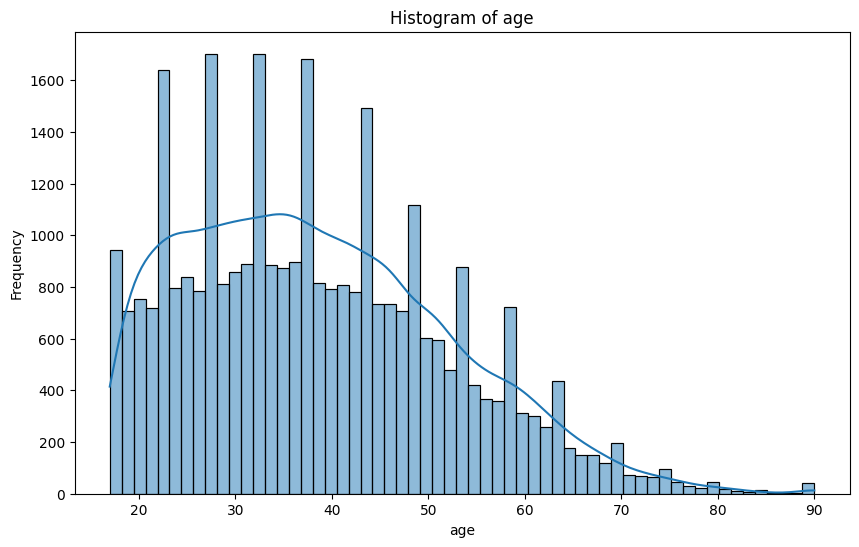

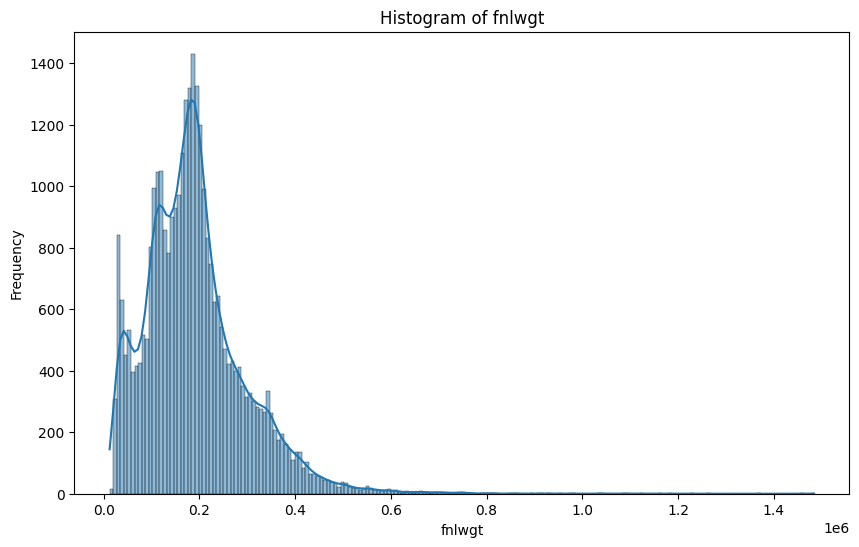

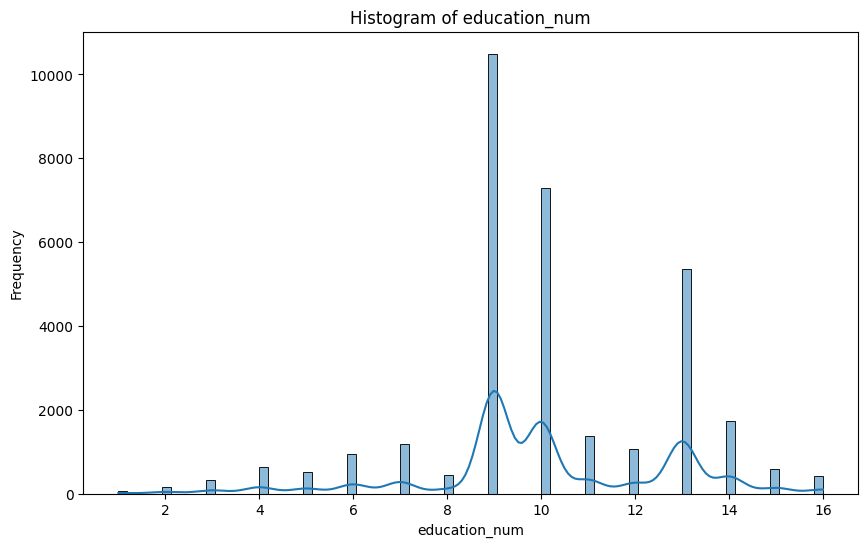

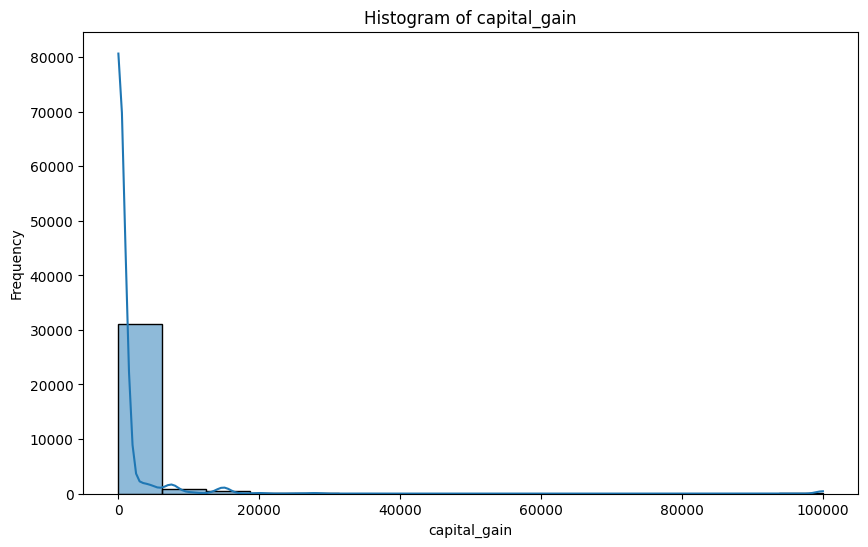

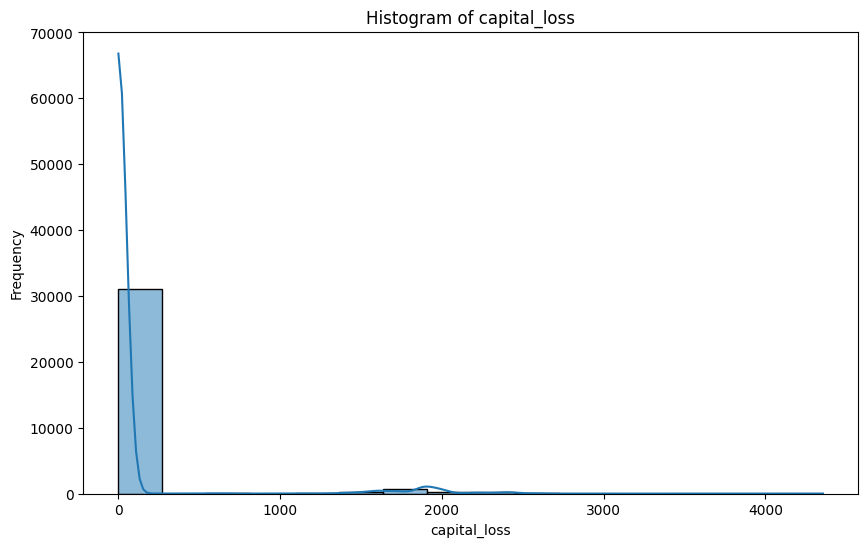

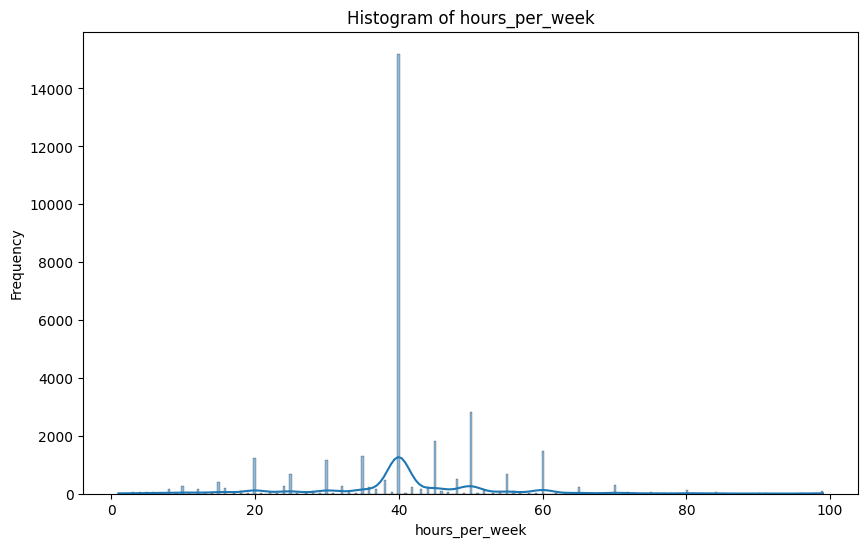

In [12]:
# histplots for numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

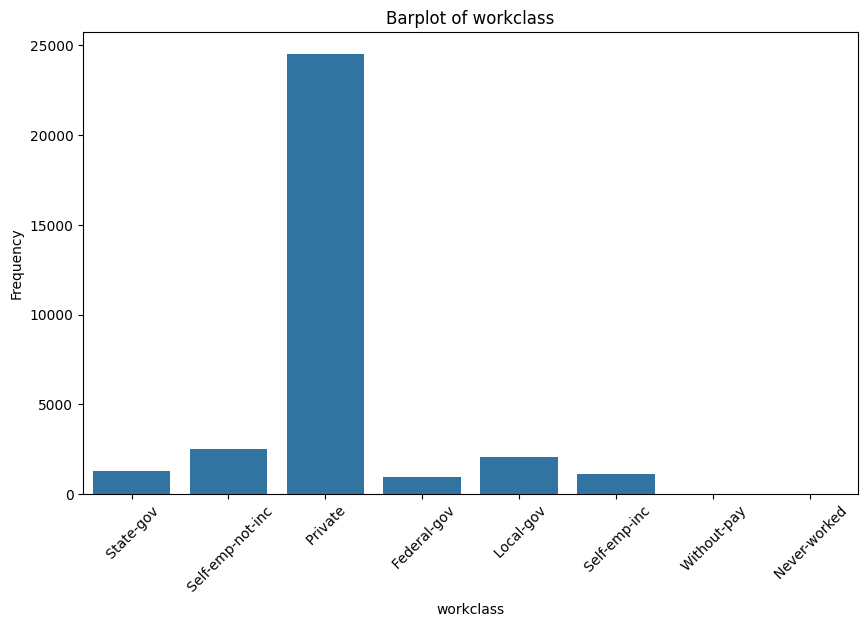

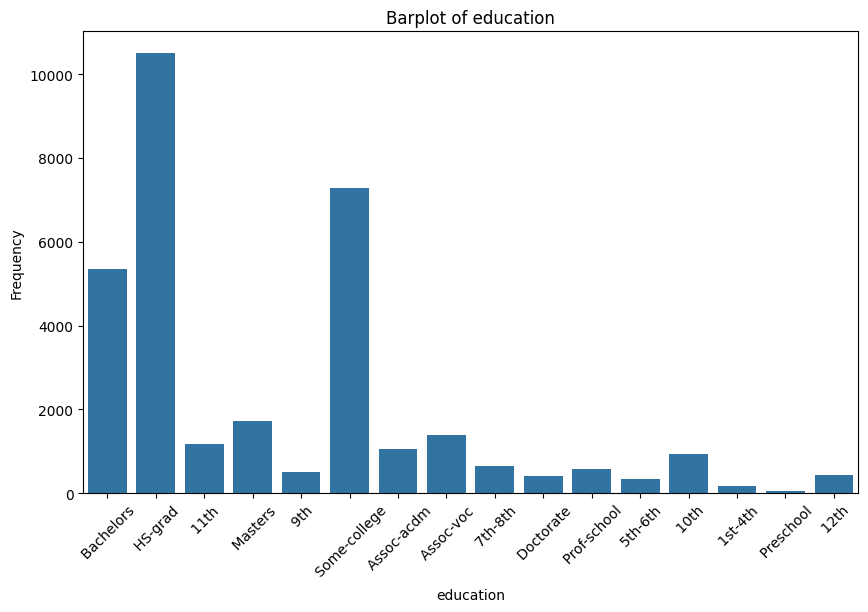

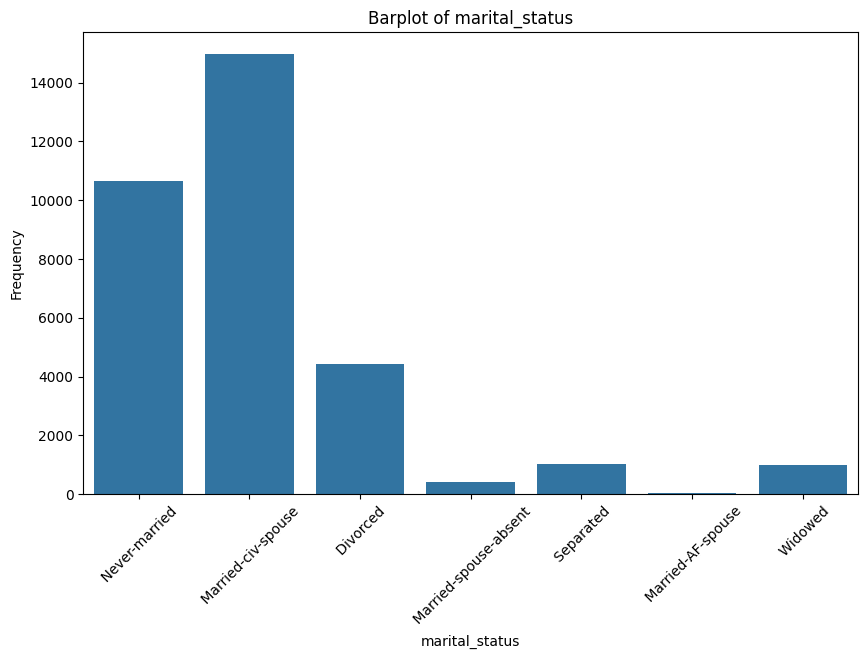

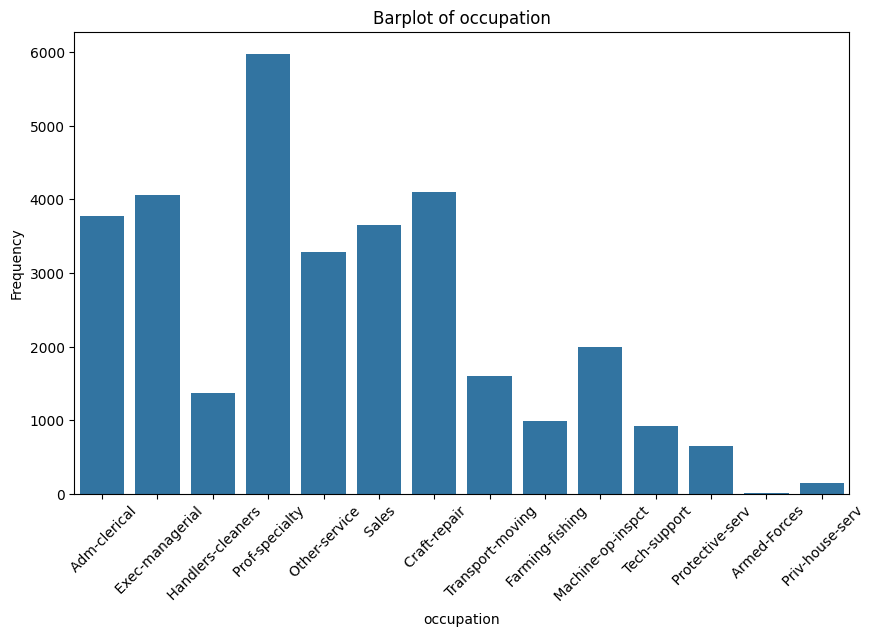

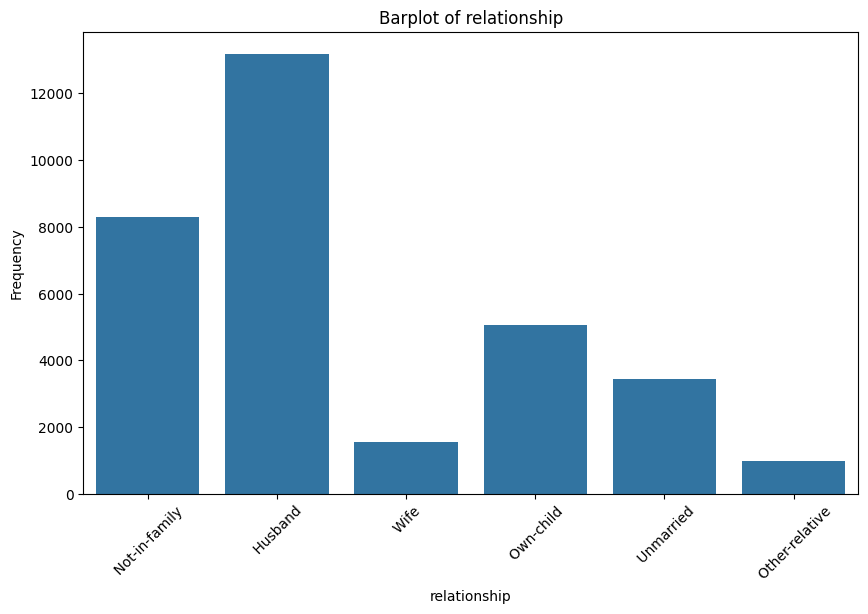

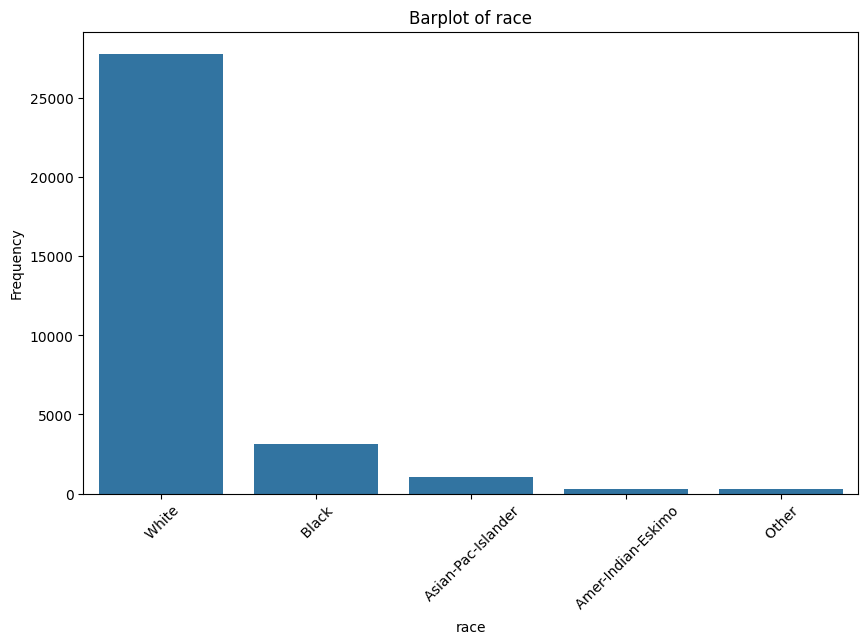

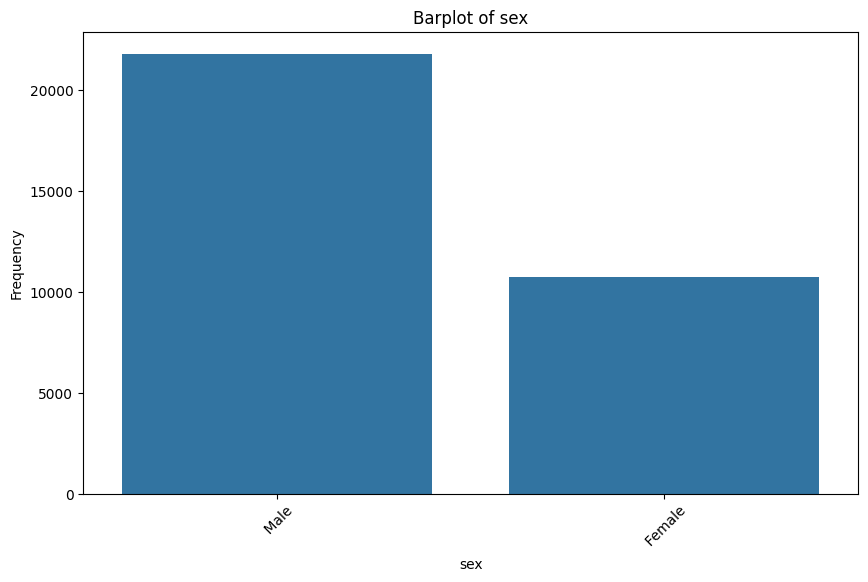

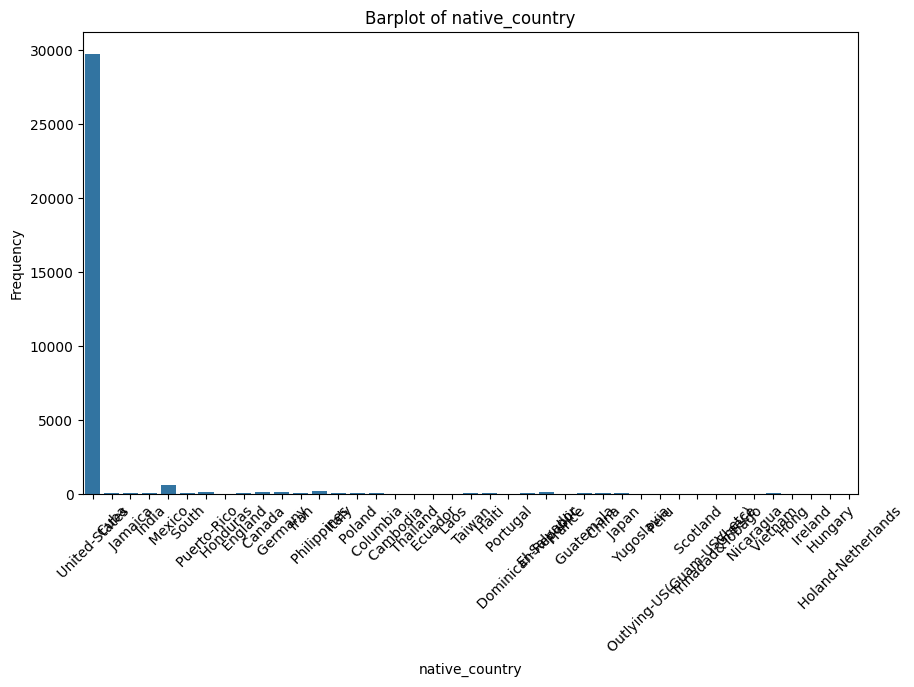

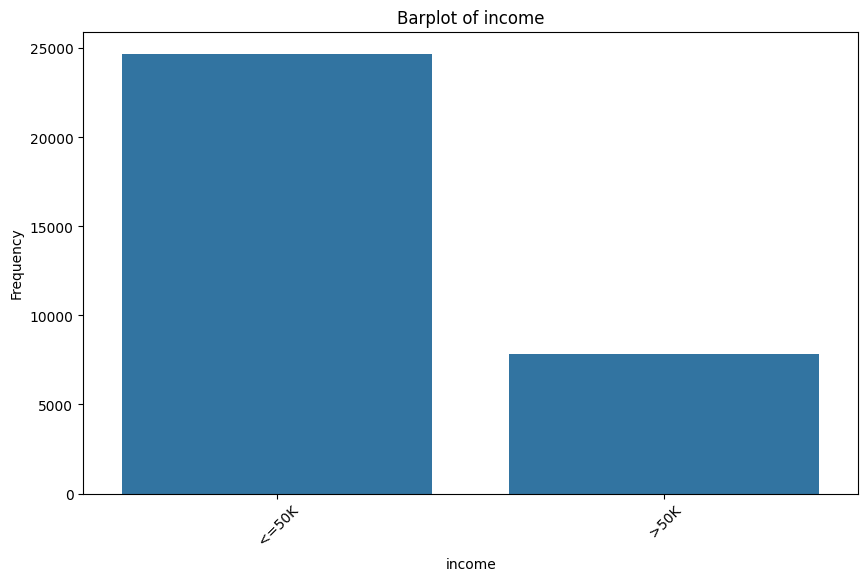

In [13]:
# barplots for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Barplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [14]:
# converting Income column to 0/1
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
num_cols = np.append(num_cols, 'income')

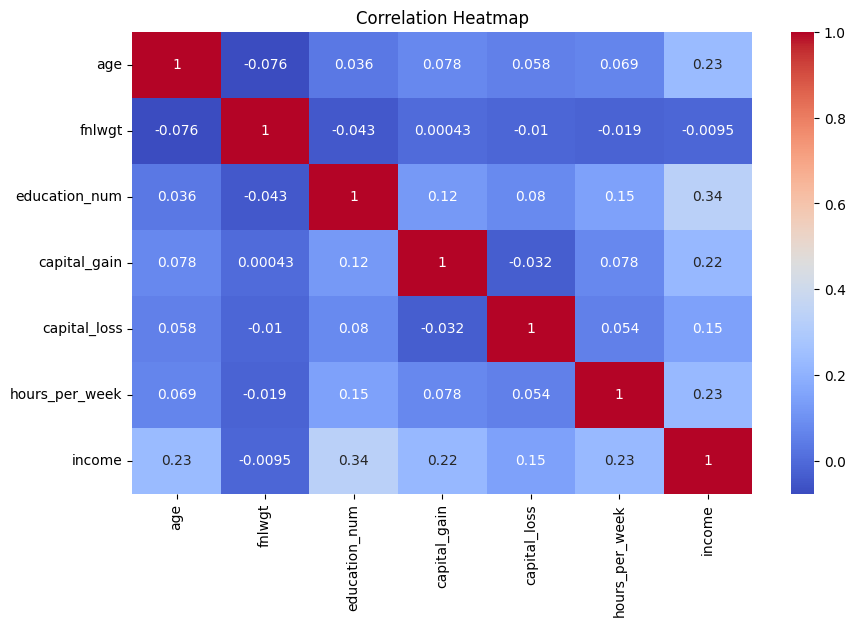

In [15]:
# heatmap for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


*   From above, We can drop feature fnlwgt as it is least significant in deciding income.
*   Education_num specifies the numerical value of education level. We can drop column education.
*   From Barplots, We can drop native_country as it has least variabiltiy.
*   Marital_status provides necessary information for a person's relationship. By this we can drop relationship column.



In [16]:
# drop fnlwgt, education, relationship, native_country
df = df.drop(['fnlwgt', 'education', 'relationship', 'native_country'], axis=1)

## Encoding Techniques

In [17]:
# applying one hot encoding for categorical columns with less than 5 categories
from sklearn.preprocessing import OneHotEncoder

cat_cols = df.select_dtypes(include=['object']).columns
onehot_cols = []
for col in cat_cols:
    if df[col].nunique() < 5:
        onehot_cols.append(col)
print(onehot_cols)

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[onehot_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(onehot_cols))
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(onehot_cols, axis=1)

['sex']


**Pros:**



*   Makes columns to binary, Easy interpretation, Good for most of the ML models.

**Cons:**

*   Increase in dimensionality.
*   If not handled properly, there might be chance of creating dummy variables.



In [18]:
# applying Label encoding for categorical columns with morethan or equal to 5 categories
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns
label_cols=[]
for col in cat_cols:
    if df[col].nunique() >= 5:
        label_cols.append(col)
print(label_cols)

label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

['workclass', 'marital_status', 'occupation', 'race']


**Pros:**

*   Dimensionality preservation.
*   Memory efficiency.

**Cons:**
*   Misinterpretation. On considering values as numerical variables, some of the ML models will misinterpret the computations.

## Feature Engineering

Splitting age into groups can give us more information about the income of people across different groups of age.

In [19]:
# splitting age into groups
bins = [0,18,25,35,45,60,100]
labels=['<18','18-25','25-35','35-45','45-60','60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

Capital net from capital gain and capital loss simplifies for analysis and gives us financial position on person.

In [20]:
df['capital_net'] = df['capital_gain'] - df['capital_loss']

Applying log on capital_gain as the feature is highly skewed.

In [21]:
# log on capital_gain
df['capital_gain'] = np.log1p(df['capital_gain'])

In [22]:
df.head()

,age,workclass,education_num,marital_status,occupation,race,capital_gain,capital_loss,hours_per_week,income,sex_ Male,age_group,capital_net
0,39.0,6,13.0,4,0,4,7.684784,0.0,40.0,0.0,1.0,35-45,2174.0
1,50.0,5,13.0,2,3,4,0.000000,0.0,13.0,0.0,1.0,45-60,0.0
2,38.0,3,9.0,0,5,4,0.000000,0.0,40.0,0.0,1.0,35-45,0.0
3,53.0,3,7.0,2,5,2,0.000000,0.0,40.0,0.0,1.0,45-60,0.0
4,28.0,3,13.0,2,9,2,0.000000,0.0,40.0,0.0,0.0,25-35,0.0


<Axes: xlabel='capital_gain', ylabel='Count'>

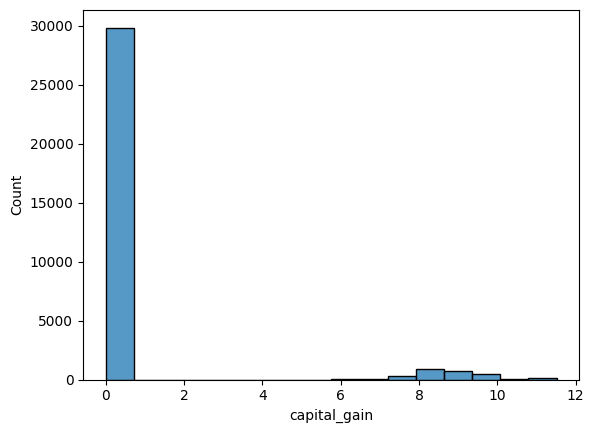

In [23]:
# histplot for capital gain
sns.histplot(df['capital_gain'])

## Feature Selection

In [24]:
# Isolation Forest to remove outliers
from sklearn.ensemble import IsolationForest

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
iso_forest = IsolationForest(contamination=0.05, random_state=42)
label = iso_forest.fit_predict(df[num_cols])
df_clean = df[label != -1]
(df.shape,df_clean.shape)

((32561, 13), (30933, 13))

Outliers reduce accuracy, stability & generalization (Many ML models assumes normally distributed data).

In [25]:
pip install ppscore

In [27]:
# pps score
import ppscore as pps
pps_matrix = pps.matrix(df_clean)

# displaying top relations
pps_matrix[(pps_matrix['x'] != pps_matrix['y'])].sort_values('ppscore', ascending=False).head()

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
11,age,age_group,1.000000,classification,True,weighted F1,0.216000,1.000000,DecisionTreeClassifier()
162,capital_net,capital_gain,0.997808,regression,True,mean absolute error,0.523014,0.001147,DecisionTreeRegressor()
163,capital_net,capital_loss,0.997658,regression,True,mean absolute error,56.354200,0.132000,DecisionTreeRegressor()
143,age_group,age,0.752734,regression,True,mean absolute error,11.103800,2.745591,DecisionTreeRegressor()
90,capital_gain,capital_net,0.736383,regression,True,mean absolute error,416.918000,109.906644,DecisionTreeRegressor()


Compared to correlation, ppscore can be applied on both numerical & categorical data. ppscore is assymetric (A predicting B is different to B predicting A).